Import pakages and libraries

In [38]:
from sklearn import linear_model
from sklearn import datasets
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

load the data

In [28]:
my_data = datasets.load_boston()

Check the keys

In [8]:
my_data.keys()


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Show shape of data

In [9]:
my_data.data.shape


(506, 13)

check feature names

In [10]:
my_data.feature_names


array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

Describe the data

In [12]:
print(my_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Convert into DataFrame & set features as columns

In [18]:
df = pd.DataFrame(my_data.data, columns=my_data.feature_names)


Show the data head

In [19]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [20]:
# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(my_data.target, columns=["MEDV"])

In [22]:
my_data.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [23]:
# for train and validation
X = df
y=my_data.target

Fit the linear model

In [24]:
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

predict y using linear model coefficients

In [25]:
predictions = lm.predict(X) 

In [ ]:
Show a heatmap

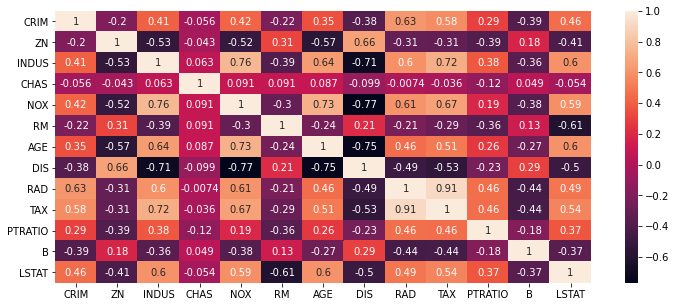

In [29]:
plt.figure(figsize=(12,5))
sns.heatmap(X.corr(), annot = True)
plt.show()

Visualize in a scatter plot

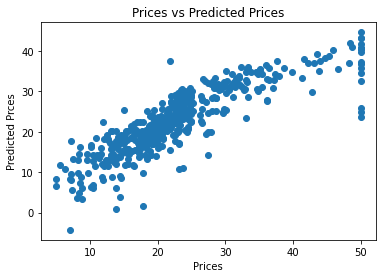

In [31]:
plt.scatter(y,predictions) 
plt.xlabel("Prices") 
plt.ylabel("Predicted Prces") 
plt.title("Prices vs Predicted Prices") 
plt.show()

split the train and test data than fit the model

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lm.fit(X_train, y_train)

LinearRegression()

Print R squared score

In [35]:
y_pred = lm.predict(X_test)
print('Linear Regression R squared": %.4f' % lm.score(X_test, y_test))

Linear Regression R squared": 0.7112


print Absolute and MSE error  

In [39]:
error_mse = mean_squared_error(y_pred, y_test)
print('Mean absolute error',mean_absolute_error(y_pred, y_test))
print('Mean square error',error_mse)
error_rmse = np.sqrt(error_mse)
print('Linear Regression RMSE: %.4f' % error_rmse)

Mean absolute error 3.16270987145742
Mean square error 21.51744423117737
Linear Regression RMSE: 4.6387
